# Compare the two type of method for colour checker detection
* detect_colour_checkers_segmentation
* detect_colour_checkers_inference

In [1]:
import glob
import os
import colour
import numpy as np

from colour_checker_detection import (
    ROOT_RESOURCES_EXAMPLES,
    detect_colour_checkers_segmentation,
)

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.11.13 (main, Jun  4 2025, 08:57:30) [GCC 13.3.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.6                                                        *
*       colour-checker-detection : 0.2.1                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.37.0                                                      *
*       matplotlib : 3.10.6                                                   *
*       networkx : 3.5                                                        *
*       numpy : 2.2.6                   

In [2]:
COLOUR_CHECKER_IMAGE_PATHS = glob.glob(
    os.path.join(ROOT_RESOURCES_EXAMPLES, "detection", "*19*.png")
)

#path_dir="/home/girobat/Olive/foto olivo del  07.08.24/da01c0"
#path_dir="/home/girobat/Olive/foto olivo del  07.08.24/muo1c0"
path_dir="/home/girobat/Olive/foto olivo del  07.08.24/foto 11.09.24 olivo università"
#path_dir="/home/girobat/Olive/foto olivo del  07.08.24/foto olivo 28.08.24"
COLOUR_CHECKER_IMAGE_PATHS = glob.glob(
    os.path.join(path_dir, '*.jpg'))

COLOUR_CHECKER_IMAGES = [
    colour.cctf_decoding(colour.io.read_image(path))
    for path in COLOUR_CHECKER_IMAGE_PATHS
]

/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028


KeyboardInterrupt: 

In [ ]:
def process_detection(detected_list, image_data, method_name, path):
    """Processes a single detection result, returning processed image data or a black placeholder."""

    # No Detection Case
    if not detected_list:
        print(f"⚠️ {method_name} failed to detect color checker in: {os.path.basename(path)}")

        # Create a black placeholder image (R, G, B = 0)
        h, w, c = image_data.shape
        black_placeholder = np.zeros_like(image_data)

        # The mask_overlay will just be the black image for no detection
        return (black_placeholder, black_placeholder, os.path.basename(path)), False

    # Successful Detection Case
    detected_item = detected_list[0].values
    
    # Safely access data
    swatch_colours, swatch_masks, colour_checker_image, quadrilateral = detected_item

    # Apply masks to create an overlay for visualization
    masks_i = np.zeros(colour_checker_image.shape)
    for mask in swatch_masks:
        # Assuming the mask is an array of [y_start, y_end, x_start, x_end] as in the original code
        masks_i[mask[0]:mask[1], mask[2]:mask[3], ...] = 1

    # Apply visible mask overlay (dim the image slightly where swatches are found)
    mask_overlay = np.clip(colour_checker_image + masks_i * 0.25, 0, 1)
    
    return (colour_checker_image, mask_overlay, os.path.basename(path)), True

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import colour
# %matplotlib inline # Retained for environment compatibility
import ipywidgets as widgets
from IPython.display import display, clear_output

# import detection function
from colour_checker_detection import detect_colour_checkers_segmentation, detect_colour_checkers_inference

# --- build data lists ---
DATA_SEGMENTATION = []
DATA_INFERENCE = []

NO_COLOUR_CHECKERS_PATH_SEGMENTATION = []
NO_COLOUR_CHECKERS_PATH_INFERENCE = []
counter=0
# Loop through images and process detections
for img, path in zip(COLOUR_CHECKER_IMAGES, COLOUR_CHECKER_IMAGE_PATHS):
    counter+=1
    if counter>15:
        break   
    
    # Run both detection methods
    detected_seg = detect_colour_checkers_segmentation(img, additional_data=True)
    detected_inf = detect_colour_checkers_inference(img, additional_data=True)

    # Process Segmentation Result
    seg_data, seg_detected_flag = process_detection(
        detected_seg, img, "Segmentation", path
    )
    DATA_SEGMENTATION.append(seg_data)
    if not seg_detected_flag:
        NO_COLOUR_CHECKERS_PATH_SEGMENTATION.append(path)

    # Process Inference Result 
    inf_data, inf_detected_flag = process_detection(
        detected_inf, img, "Inference", path
    )
    DATA_INFERENCE.append(inf_data)
    if not inf_detected_flag:
        NO_COLOUR_CHECKERS_PATH_INFERENCE.append(path)

print(f"✅ Loaded {len(DATA_SEGMENTATION)} valid colour checker detections for segmentation.")
print(f"⚠️ {len(NO_COLOUR_CHECKERS_PATH_SEGMENTATION)} images without detected colour checker for segmentation.")

print(f"✅ Loaded {len(DATA_INFERENCE)} valid colour checker detections for inference.")
print(f"⚠️ {len(NO_COLOUR_CHECKERS_PATH_INFERENCE)} images without detected colour checker for inference.")

/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 1 ColorCheckerClassic24, 2710.9ms
Speed: 100.6ms preprocess, 2710.9ms inference, 10.5ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Segmentation failed to detect color checker in: IMG_20240910_080200.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 3 ColorCheckerClassic24s, 2390.5ms
Speed: 65.5ms preprocess, 2390.5ms inference, 11.6ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 1280x960 1 ColorCheckerClassic24, 2391.8ms
Speed: 68.5ms preprocess, 2391.8ms inference, 4.6ms postprocess per image at shape (1, 3, 1280, 960)
⚠️ Inference failed to detect color checker in: IMG_20240910_074509.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2478.4ms
Speed: 66.2ms preprocess, 2478.4ms inference, 7.9ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Inference failed to detect color checker in: IMG_20240910_075133.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 1 ColorCheckerClassic24, 2446.2ms
Speed: 68.9ms preprocess, 2446.2ms inference, 15.8ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Inference failed to detect color checker in: IMG_20240910_080247.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 1280x960 1 ColorCheckerClassic24, 2425.1ms
Speed: 66.9ms preprocess, 2425.1ms inference, 5.3ms postprocess per image at shape (1, 3, 1280, 960)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 1 ColorCheckerClassic24, 2411.1ms
Speed: 66.0ms preprocess, 2411.1ms inference, 4.3ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 3 ColorCheckerClassic24s, 2498.9ms
Speed: 67.5ms preprocess, 2498.9ms inference, 12.0ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Segmentation failed to detect color checker in: IMG_20240910_080215.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 1 ColorCheckerClassic24, 2412.2ms
Speed: 65.7ms preprocess, 2412.2ms inference, 4.3ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2409.7ms
Speed: 66.0ms preprocess, 2409.7ms inference, 7.9ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2444.3ms
Speed: 66.4ms preprocess, 2444.3ms inference, 8.0ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Inference failed to detect color checker in: IMG_20240910_080229.jpg


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2436.1ms
Speed: 65.7ms preprocess, 2436.1ms inference, 8.5ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 1 ColorCheckerClassic24, 2400.6ms
Speed: 67.3ms preprocess, 2400.6ms inference, 4.7ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2441.7ms
Speed: 66.5ms preprocess, 2441.7ms inference, 8.4ms postprocess per image at shape (1, 3, 960, 1280)


/home/girobat/Olive/venv_311/lib/python3.11/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028



0: 960x1280 2 ColorCheckerClassic24s, 2399.9ms
Speed: 65.8ms preprocess, 2399.9ms inference, 8.2ms postprocess per image at shape (1, 3, 960, 1280)
⚠️ Inference failed to detect color checker in: IMG_20240910_080228.jpg
✅ Loaded 15 valid colour checker detections for segmentation.
⚠️ 2 images without detected colour checker for segmentation.
✅ Loaded 15 valid colour checker detections for inference.
⚠️ 5 images without detected colour checker for inference.


Total Images: 15 | Images per Page: 3 | Total Pages: 5


IntSlider(value=0, description='Page:', max=4)

Output()

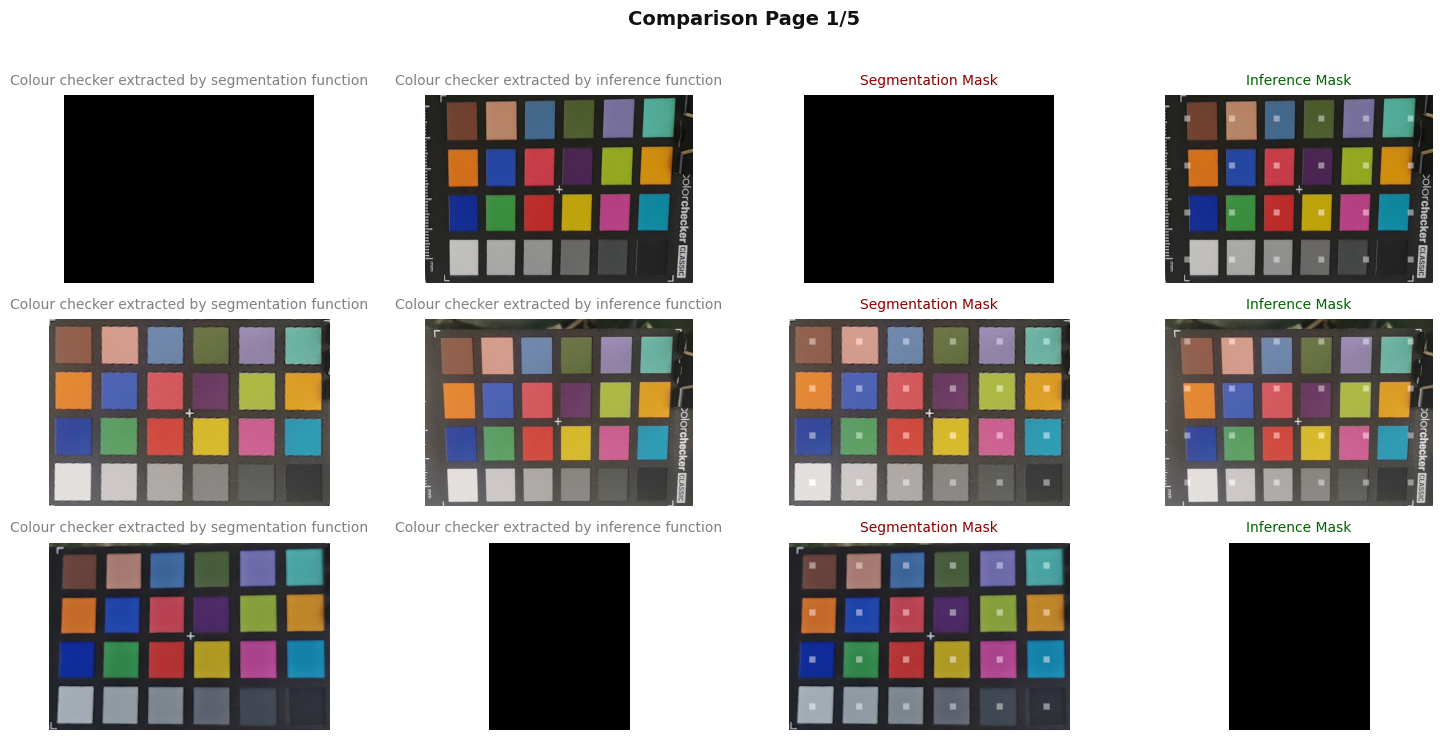

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import colour
# The environment must have DATA_SEGMENTATION and DATA_INFERENCE lists defined.
# Assuming %matplotlib inline, ipywidgets, and clear_output are available.
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- parameters ---
IMAGES_PER_PAGE = 3

# --- function to show a page ---
def show_page_comparison(page):
    # Close old figure to avoid stacking outputs, especially important in notebooks
    plt.close('all') 
    
    # Calculate indices for subsetting the synchronized data lists
    start = page * IMAGES_PER_PAGE
    end = start + IMAGES_PER_PAGE
    
    # Slice both data lists to get the synchronized subsets
    subset_seg = DATA_SEGMENTATION[start:end]
    subset_inf = DATA_INFERENCE[start:end]
    
    n = len(subset_seg)

    # Create figure with n rows and 4 columns (Original, Inference Mask, Segmentation Mask)
    fig, axes = plt.subplots(n, 4, figsize=(15, 2.5 * n))
    
    if n == 1:
        # Ensure 'axes' is a 2D array even for a single image for uniform indexing
        axes = np.array([axes])

    for i in range(n):
        # Unpack synchronized data items
        # Structure: (original_image, mask_overlay, name)
        (orig_seg, mask_seg, name_seg) = subset_seg[i]
        (orig_inf, mask_inf, name_inf) = subset_inf[i]
        
        # We only need one copy of the original image data and name, 
        # so we use the segmentation result's 'orig' and 'name'.

        # --- Column 1: Displaying the extracted colour checker by the segmentation function ---
        ax1 = axes[i, 0]
        ax1.imshow(colour.cctf_encoding(np.clip(orig_seg, 0, 1)))
        ax1.set_title(f"Colour checker extracted by segmentation function", fontsize=10, color='gray')
        #ax1.set_title(f"{name_seg} (Colour checker extracted by segmentation function)", fontsize=10, color='gray')
        ax1.axis("off")

        # --- Column 2: Displaying the extracted colour checker by the inference function ---
        ax2 = axes[i, 1]
        # # Displaying the extracted colour checker by the infrence function
        ax2.imshow(colour.cctf_encoding(np.clip(orig_inf, 0, 1))) 
        ax2.set_title("Colour checker extracted by inference function", fontsize=10, color='gray')
        ax2.axis("off")

        # --- Column 3: Segmentation Mask (e.g., Traditional) ---
        ax4 = axes[i, 2]
        ax4.imshow(colour.cctf_encoding(np.clip(mask_seg, 0, 1)))
        ax4.set_title("Segmentation Mask", fontsize=10, color='darkred')
        ax4.axis("off")

        # --- Column 4: Inference Mask ---
        ax3 = axes[i, 3]
        ax3.imshow(colour.cctf_encoding(np.clip(mask_inf, 0, 1)))
        ax3.set_title("Inference Mask", fontsize=10, color='darkgreen')
        ax3.axis("off")

        
    # Set overall title
    max_pages = (len(DATA_SEGMENTATION) - 1) // IMAGES_PER_PAGE + 1
    fig.suptitle(f"Comparison Page {page+1}/{max_pages}", fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# --- create slider for navigation ---
# Note: Max pages is calculated based on the length of one of the synchronized lists
max_page_index = (len(DATA_SEGMENTATION) - 1) // IMAGES_PER_PAGE

page_slider = widgets.IntSlider(
    min=0, 
    max=max_page_index, 
    step=1, 
    value=0,
    description='Page:'
)
output = widgets.Output()

def update_page_comparison(change):
    with output:
        clear_output(wait=True)
        # Call the new function
        show_page_comparison(change['new'])

page_slider.observe(update_page_comparison, names='value')

# --- Display widgets and initial page ---
print(f"Total Images: {len(DATA_SEGMENTATION)} | Images per Page: {IMAGES_PER_PAGE} | Total Pages: {max_page_index + 1}")
display(page_slider, output)
show_page_comparison(0)